In [7]:
import json

import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from sklearn.metrics import auc, roc_curve

# Read data

In [8]:
with open("../data/processed/training_results.json", "r") as f:
    history_data = json.load(f)

In [9]:
with open("../data/processed/iris_training_data.json", "r") as f:
    testing_data = json.load(f)

# Visualiser les résultats

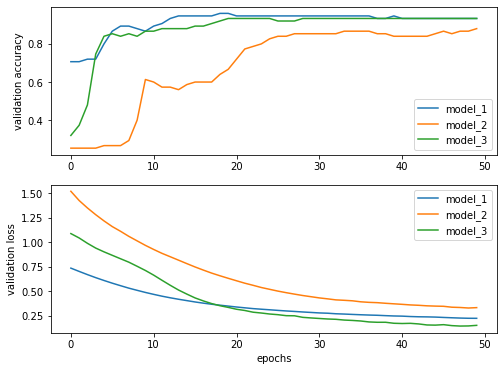

In [10]:
_, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name, history in history_data.items():
    val_accurady = history.get('val_accuracy')
    val_loss = history.get('val_loss')
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

In [11]:
X_test = np.array(testing_data.get("X_test"))
Y_test = np.array(testing_data.get("Y_test"))

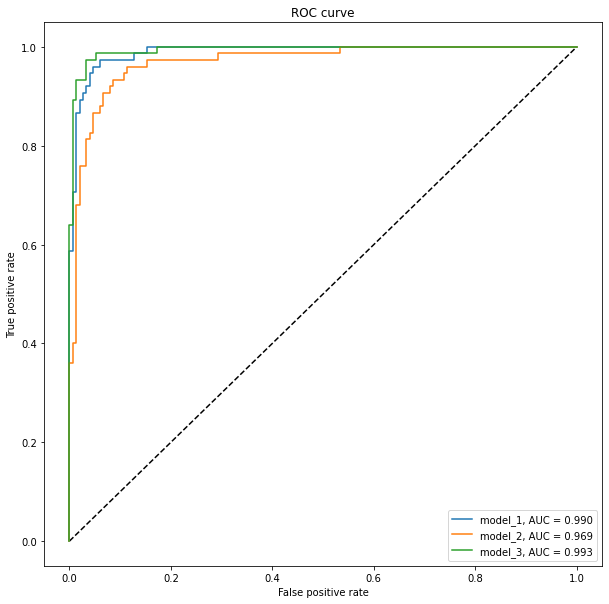

In [12]:
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_data:
    model = keras.models.load_model(f"../models/{model_name}")
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();